In [3]:
#/usr/bin/python
"""This cell ......

"""

import os
import numpy as np

img_path = '/home/deep/Documents/zongzuo/c++codes/c++learning/1.jpg'
def getSeetaFeature(img_path):
    oStdout = os.popen('/home/deep/develop/SeetaFaceEngine-master/FaceIdentification/build/src/test/test_face_recognizer.bin'+' '+img_path)  
    vectorlist = []
    for line in oStdout.readlines():
        line = line.strip()
        if line.count(' ') == 2047:
            featlist = []
            featlist = line.split(' ', 2047)
            vectorlist.append(np.asarray(featlist).astype('float64'))
    return vectorlist

def CalcSimilarity(feat1, feat2):
    feat1 = feat1.reshape((1, feat1.shape[0]))
    feat2 = feat2.reshape((1, feat2.shape[0]))
    return float(np.dot(feat1, feat2.T) / (np.sqrt(np.dot(feat1, feat1.T)) * np.sqrt(np.dot(feat2, feat2.T))))


In [91]:
#/usr/bin/python
"""This cell ......

"""

import os
import numpy as np

img_root = '/home/deep/Documents/zongzuo/pythoncodes/leaders_old/leaders_images/习近平/单人/'

FeatList = []
for roots, dirs, fils in os.walk(img_root):
    for fil in fils:
#         print roots, fil
        featlist = getSeetaFeature(os.path.join(roots, fil))
        print os.path.join(roots, fil)
        assert len(featlist) == 1 # ensure there is only 1 person in the image
        FeatList += featlist

(2048,)
/home/deep/Documents/zongzuo/pythoncodes/leaders_old/leaders_images/习近平/单人/1fec6730e3367d87ba2b2c694c8151f3.jpg
(2048,)
/home/deep/Documents/zongzuo/pythoncodes/leaders_old/leaders_images/习近平/单人/e1d79e4946eeb1667ae8e2d2ec3c9942.png
(2048,)
/home/deep/Documents/zongzuo/pythoncodes/leaders_old/leaders_images/习近平/单人/a0e386e4fdfcfc3748e35aeadf1be700.jpg
(2048,)
/home/deep/Documents/zongzuo/pythoncodes/leaders_old/leaders_images/习近平/单人/a44a3b474545e2d55e1adb14ded80ca4.jpg
(2048,)
/home/deep/Documents/zongzuo/pythoncodes/leaders_old/leaders_images/习近平/单人/1879de469eb211daf6f36178bc9a9de6.jpg
(2048,)
/home/deep/Documents/zongzuo/pythoncodes/leaders_old/leaders_images/习近平/单人/1f2113225dfc0c92840630da5d96f2c2.jpg
(2048,)
/home/deep/Documents/zongzuo/pythoncodes/leaders_old/leaders_images/习近平/单人/725cda98830737975679853718e3e954.jpg
(2048,)
/home/deep/Documents/zongzuo/pythoncodes/leaders_old/leaders_images/习近平/单人/bbec8157d7e1978bb67c7745c1c110ac.jpg
(2048,)
/home/deep/Documents/zongzuo/pyt

In [94]:
from random import randint
i = randint(0, len(FeatList) - 1)
j = randint(0, len(FeatList) - 1)
print i, j
# print len(FeatList[i])
print CalcSimilarity(FeatList[i], FeatList[j])

16 13
0.715889498216


In [ ]:
"""This cell extracts features for both training and validation images, and 
store the extracted results in a .npy file.

"""
import numpy as np

img_root = '/home/deep/develop/caffe/data/politics_project_data/data_11_16/images/'
extractedfeatures = np.zeros(shape = (1167, 2048))
for i in xrange(1167):
    img_path = img_root+str(i+1)+'.jpg'
    featurelist = getSeetaFeature(img_path)
    if len(featurelist) > 0:
        extractedfeatures[i,:] = featurelist[0]  #Assume there is only 1 face in the picture
    else:
        extractedfeatures[i,:] = -1
    print i
np.save('data_11_16_extractedfeatures.npy', extractedfeatures)

0
1
2
3
4



KeyboardInterrupt



In [2]:
#!/usr/bin/python
"""This cell merges several .npy into a single .npy

"""

import numpy as np

path1 = '/home/deep/Documents/zongzuo/pythoncodes/politics_project/data_11_16_extractedfeatures_0_200.npy'
path2 = '/home/deep/Documents/zongzuo/pythoncodes/politics_project/data_11_16_extractedfeatures_200_400.npy'
path3 = '/home/deep/Documents/zongzuo/pythoncodes/politics_project/data_11_16_extractedfeatures_400_600.npy'
path4 = '/home/deep/Documents/zongzuo/pythoncodes/politics_project/data_11_16_extractedfeatures_600_800.npy'
path5 = '/home/deep/Documents/zongzuo/pythoncodes/politics_project/data_11_16_extractedfeatures_800_1000.npy'
path6 = '/home/deep/Documents/zongzuo/pythoncodes/politics_project/data_11_16_extractedfeatures_1000_1167.npy'

MatMerge = np.zeros(shape = (1167, 2048))
MatMerge[0 : 200, :] = np.load(path1)[0 : 200, :]
MatMerge[200 : 400, :] = np.load(path2)[200 : 400, :]
MatMerge[400 : 600, :] = np.load(path3)[400 : 600, :]
MatMerge[600 : 800, :] = np.load(path4)[600 : 800, :]
MatMerge[800 : 1000, :] = np.load(path5)[800 : 1000, :]
MatMerge[1000 : 1167, :] = np.load(path6)[1000 : 1167, :]

np.save('/home/deep/Documents/zongzuo/pythoncodes/politics_project/data_11_16_extractedfeatures_0_1167.npy', MatMerge)

In [ ]:
#!/usr/bin/python
"""This cell converts the XXX.jpg in annotation files 'train.txt' and 
'validation.txt' into consecutive IDs for easier .npy indexing. The 
results are written into file 'train_c.txt' and 'validation_c.txt'.

"""

import os


In [209]:
#!/usr/bin/python
"""This cell runs a test over data_11_16。

"""

import numpy as np

ext_feat = np.load('/home/deep/Documents/zongzuo/pythoncodes/politics_project/data_11_16_extractedfeatures_0_1167.npy')

# Get ground truth labels, stored in a N*2 label_matrix, the first coloum 
# is XXX which comes from 'XXX.jpg', the second coloum is the ground truth label
label_matrix = np.ones(shape = (1047, 2)).astype('int32');
gt_count = 0
with open('/home/deep/develop/caffe/data/politics_project_data/data_11_16/train.txt') as gt_file:
    for line in gt_file:
        line = line.strip()
        if line.find('.jpg') >= 0:
            label_matrix[gt_count, 0] = int(line.split('.jpg')[0])
        else:
            if line:  #exclude the last empty line
                label_matrix[gt_count, 1] = int(line)
                gt_count += 1

# Get validation set labels, stored in a N*2 labelmatrix, the first coloum 
# is XXX which comes from 'XXX.jpg', the second coloum is the ground truth label
val_matrix = np.ones(shape = (120, 2)).astype('int32');
val_count = 0
with open('/home/deep/develop/caffe/data/politics_project_data/data_11_16/validation.txt') as val_file:
    for line in val_file:
        line = line.strip()
        if line.find('.jpg') >= 0:
            val_matrix[val_count, 0] = int(line.split('.jpg')[0])
        else:
            if line:  #exclude the last empty line
                val_matrix[val_count, 1] = int(line)
                val_count += 1

# This section converts the XXX from annotation files 'train.txt' and 
# 'validation.txt' into consecutive IDs for easier .npy indexing.
new_label = 0
label_matrix2 = label_matrix.copy()
val_matrix2 = val_matrix.copy()
for comp in xrange(1200):
    add_flag = False
    for i in xrange(label_matrix.shape[0]):
        if label_matrix[i, 0] == comp:
            label_matrix2[i, 0] = new_label
            add_flag = True
            break
    for i in xrange(val_matrix.shape[0]):
        if val_matrix[i, 0] == comp:
            val_matrix2[i, 0] = new_label
            add_flag = True
            break
    if add_flag == True:
        new_label += 1
#     print comp

label_matrix = label_matrix2.copy()
val_matrix = val_matrix2.copy()


In [79]:
# print label_matrix2[:, :]
# print val_matrix2[:, :], new_label#, np.equal(label_matrix, label_matrix2).any()
print label_matrix,'\n'
print label_matrix2

print

[[   1    7]
 [   2    7]
 [   3    7]
 ..., 
 [1177    8]
 [1178    8]
 [1179    8]] 

[[   0    7]
 [   1    7]
 [   2    7]
 ..., 
 [1164    8]
 [1165    8]
 [1166    8]]


In [210]:
def get_cos_distance(gt_matrix, input_vector):
    """ A function that compares an input image with all the labelled 
    images (cacluating similarities) using cosine distance.
    
    Args:
        gt_matrix: A N*k matrix, each row is a sample with k dimensions.
        input_vector: A 1*k matrix.
    
    Returns:
        dis_matrix: A N*1 matrix, each row represents the cosine distance 
            between the input_vector and the corresponding gt_matrix.
    """
    number = gt_matrix.shape[0]
    dis_matrix = np.zeros(shape = (number, 1))
    cmpa = -1 * np.ones(shape = (1, 2048))
    for i in xrange(number):
        if not np.equal(gt_matrix[i, :], cmpa).any(): 
            dis_matrix[i, 0] = float(np.dot(gt_matrix[i, :], input_vector.T) / 
                                     (np.sqrt(np.dot(gt_matrix[i, :], gt_matrix[i, :].T)) *
                                      np.sqrt(np.dot(input_vector, input_vector.T)))
                                    )
        else:
            dis_matrix[i, 0] = -999
    return dis_matrix


def assign_labels(dis_vector, label_vector, k = 5):
    """ A function that prints out the assigned label.
    
    Args:
        dis_vector: A N*1 vector, each row represents the distance (float).
        label_vector: A N*1 vector, each row represents the label (int) which 
            corresponds to the dis_vector.
    
    Returns:
        label: the label which is dominant (e.g weighted sum) within the top-k (smallest distance).
    """
    assert dis_vector.shape == label_vector.shape
    assert dis_vector.shape[1] == 1
    
    dis_label = np.hstack((dis_vector, label_vector))
    sorted_matrix = dis_label[dis_label[:, 0].argsort(), :][::-1, :]

    label_scores = {}
    for i in xrange(k):
        if not label_scores.has_key(str(sorted_matrix[i, 1])):
            label_scores[str(sorted_matrix[i, 1])] = 0
        label_scores[str(sorted_matrix[i, 1])] += 1.0 * sorted_matrix[i, 0]
    
    # Find the label which has the max score.
    max_score = -10
    out_label = 0
    for item in label_scores.iteritems():
        label, score = item
        if score > max_score:
            max_score = score
            out_label = label
            
    return out_label, max_score


## Evaluate the accuracy using KNN
gt_matrix = ext_feat[label_matrix[:, 0], :]

for k in xrange(30):
    confusion_matrix = np.zeros(shape = (15, 15)).astype('int32')
    for i in xrange(val_matrix.shape[0]):
        val_vector = ext_feat[val_matrix[i, 0], :]
        out_label, max_score = assign_labels(get_cos_distance(gt_matrix, val_vector), 
                                  label_matrix[:, 1].reshape(label_matrix.shape[0], 1), k)
        confusion_matrix[int(val_matrix[i, 1]), int(float(out_label))] += 1
        #     print i
    #     print out_label, max_score
#     print confusion_matrix
    print 'k = ', k, '; Accuracy: ', float(sum(confusion_matrix[xrange(15),xrange(15)])) / sum(sum(confusion_matrix))


k =  0 ; Accuracy:  0.0
k =  1 ; Accuracy:  0.791666666667
k =  2 ; Accuracy:  0.8
k =  3 ; Accuracy:  0.833333333333
k =  4 ; Accuracy:  0.858333333333
k =  5 ; Accuracy:  0.858333333333
k =  6 ; Accuracy:  0.85
k =  7 ; Accuracy:  0.841666666667
k =  8 ; Accuracy:  0.841666666667
k =  9 ; Accuracy:  0.841666666667
k =  10 ; Accuracy:  0.833333333333
k =  11 ; Accuracy:  0.833333333333
k =  12 ; Accuracy:  0.833333333333
k =  13 ; Accuracy:  0.833333333333
k =  14 ; Accuracy:  0.833333333333
k =  15 ; Accuracy:  0.833333333333
k =  16 ; Accuracy:  0.833333333333
k =  17 ; Accuracy:  0.833333333333
k =  18 ; Accuracy:  0.833333333333
k =  19 ; Accuracy:  0.833333333333
k =  20 ; Accuracy:  0.833333333333
k =  21 ; Accuracy:  0.833333333333
k =  22 ; Accuracy:  0.833333333333
k =  23 ; Accuracy:  0.841666666667
k =  24 ; Accuracy:  0.841666666667
k =  25 ; Accuracy:  0.833333333333
k =  26 ; Accuracy:  0.841666666667
k =  27 ; Accuracy:  0.841666666667
k =  28 ; Accuracy:  0.84166666666

In [244]:
#!/usr/bin/python
"""This file defines utility functions for calculating metrics. 
Reference: 
https://github.com/vyokky/NILM-Project/blob/master/deep-nilm/tookits/nilm_metric.py
"""

import numpy as np

def get_TP(target, prediction, threshold):
    """Computes the number of true positive.
    
    Args:
        target: Groud truth , n*1, <numpy.ndarray>
        prediction: Prediction, n*1, <numpy.ndarray>
        threshold: Threshold, <float>
    Returns:
        tp: Number of true positives <int>.
    """
    assert target.shape == prediction.shape
    assert target.shape[1] == 1
    
    target = 1-np.clip(target, threshold, 0)/threshold
    prediction = 1-np.clip(prediction, threshold, 0)/threshold
    
    tp_array = np.logical_and(target,prediction)*1.0
    tp = int(np.sum(tp_array))
    
    return tp

def get_FP(target, prediction, threshold):
    """Computes the number of true positive.
    
    Args:
        target: Groud truth , n*1, <numpy.ndarray>
        prediction: Prediction, n*1, <numpy.ndarray>
        threshold: Threshold, <float>
    Returns:
        fp: Number of false positives <int>.
    """
    
    assert (target.shape == prediction.shape)
    
    target = np.clip(target, threshold, 0)/threshold
    prediction = 1-np.clip(prediction, threshold, 0)/threshold
    
    fp_array = np.logical_and(target,prediction)*1.0
    fp = int(np.sum(fp_array))
    
    return fp

def get_FN(target, prediction, threshold):
    """Computes the number of true positive.
    
    Args:
        target: Groud truth , n*1, <numpy.ndarray>
        prediction: Prediction, n*1, <numpy.ndarray>
        threshold: Threshold, <float>
    Returns:
        fn: Number of false negatives <int>.
    """
    
    assert (target.shape == prediction.shape)
    
    target = 1-np.clip(target, threshold, 0)/threshold
    prediction = np.clip(prediction, threshold, 0)/threshold
    
    fn_array = np.logical_and(target,prediction)*1.0
    fn = int(np.sum(fn_array))
    
    return fn


def get_TN(target, prediction, threshold):
    """Computes the number of true positive.
    
    Args:
        target: Groud truth , n*1, <numpy.ndarray>
        prediction: Prediction, n*1, <numpy.ndarray>
        threshold: Threshold, <float>
    Returns:
        tn: Number of true negatives <int>.
    """
    
    assert (target.shape == prediction.shape)
    
    target = np.clip(target, threshold, 0)/threshold
    prediction = np.clip(prediction, threshold, 0)/threshold
    
    tn_array = np.logical_and(target,prediction)*1.0
    tn = int(np.sum(tn_array))
    
    return tn

def get_recall(target, prediction, threshold):
    """Computes the number of true positive.
    
    Args:
        target: Groud truth , n*1, <numpy.ndarray>
        prediction: Prediction, n*1, <numpy.ndarray>
        threshold: Threshold, <float>
    Returns:
        recall: Recall rate <float>.
    """
    
    tp = get_TP(target, prediction, threshold)
    fn = get_FN(target, prediction, threshold)
    
    recall = tp/(tp+fn)
    return recall

def get_precision(target, prediction, threshold):
    """Computes the number of true positive.
    
    Args:
        target: Groud truth , n*1, <numpy.ndarray>
        prediction: Prediction, n*1, <numpy.ndarray>
        threshold: Threshold, <float>
    Returns:
        precision: Precision <float>.
    """
    
    tp = get_TP(target, prediction, threshold)
    fp = get_FP(target, prediction, threshold)
    
    precision = tp / (tp + fp)
    return precision

def get_F1(target, prediction, threshold):
    """Computes the number of true positive.
    
    Args:
        target: Groud truth , n*1, <numpy.ndarray>
        prediction: Prediction, n*1, <numpy.ndarray>
        threshold: Threshold, <float>
    Returns:
        f1: F1 score <float>.
    """
   
    recall = get_recall(target, prediction, threshold)
    precision = get_precision(target, prediction, threshold)
    f1 = 2 * precision * recall / (precision + recall)
    return f1

def get_accuracy(target, prediction, threshold):
    """Computes the accuracy.
    
    Args:
        target: Groud truth , n*1, <numpy.ndarray>
        prediction: Prediction, n*1, <numpy.ndarray>
        threshold: Threshold, <float>
    Returns:
        accuracy: accuracy of predictions correctly assigned <float>.
    """   

    
    tp = get_TP(target, prediction, threshold)
    tn = get_TN(target, prediction, threshold)
    
    accuracy = (tp + tn) / target.size
    
    return accuracy


In [294]:
#!/usr/bin/python
"""This cell computes metrics for each class with different thresholds.
"""

label_vector = label_matrix[:, 1].reshape(-1, 1)
print label_matrix

threshold_class_metrics = {}
for threshold in xrange(0, 11, 1):
    class_metrics = {}
    threshold = threshold / 10.0
    print "threshold: ", threshold
    for i in xrange(1, 15):
        metrics = {}
        
        gt = label_vector.copy()
        gt[gt != int(i)] = 0
        
        accuracy = 0
        recall = 0
        precision = 0
        f1 = 0
        for j in xrange(val_matrix.shape[0]):
            val_vector = ext_feat[val_matrix[j, 0], :]
            
            accuracy += np.nan_to_num(get_accuracy(gt, get_cos_distance(gt_matrix, val_vector), threshold))
            recall += np.nan_to_num(get_recall(gt, get_cos_distance(gt_matrix, val_vector), threshold))
            precision += np.nan_to_num(get_precision(gt, get_cos_distance(gt_matrix, val_vector), threshold))
            f1 += np.nan_to_num(get_F1(gt, get_cos_distance(gt_matrix, val_vector), threshold))
#             print get_F1(gt, get_cos_distance(gt_matrix, val_vector), threshold)
#             if np.isnan(get_F1(gt, get_cos_distance(gt_matrix, val_vector), threshold)):
#                 print j
#                 print np.isnan(get_F1(gt, get_cos_distance(gt_matrix, val_vector), threshold))

        metrics['accuracy'] = accuracy / val_matrix.shape[0]
        metrics['recall'] = recall / val_matrix.shape[0]
        metrics['precision'] = precision / val_matrix.shape[0]
        metrics['f1'] = f1 / val_matrix.shape[0]
#         print metrics['precision'], metrics['f1']
        
        class_metrics['class:' + str(i)] = metrics
    threshold_class_metrics['threshold:' + str(threshold)] = class_metrics

import cPickle

cPickle.dump(threshold_class_metrics, open("threshold_class_metrics","wb"))
print 'Done!'

[[   0    7]
 [   1    7]
 [   2    7]
 ..., 
 [1164    8]
 [1165    8]
 [1166    8]]
threshold:  0.0


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:22: RuntimeWarning: invalid value encountered in divide
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in divide
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:86: RuntimeWarning: invalid value encountered in divide
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:87: RuntimeWarning: invalid value encountered in divide
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:64: RuntimeWarning: invalid value encountered in divide
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:65: RuntimeWarning: invalid value encountered in divide
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:43: RuntimeWarning: invalid value encountered in divide
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:44: RuntimeWarning: invalid value encountered in divide


threshold:  0.1


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:125: RuntimeWarning: invalid value encountered in double_scalars


threshold:  0.2
threshold:  0.3
threshold:  0.4


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:141: RuntimeWarning: invalid value encountered in double_scalars


threshold:  0.5
threshold:  0.6
threshold:  0.7
threshold:  0.8
threshold:  0.9
threshold:  1.0
Done!


0.0


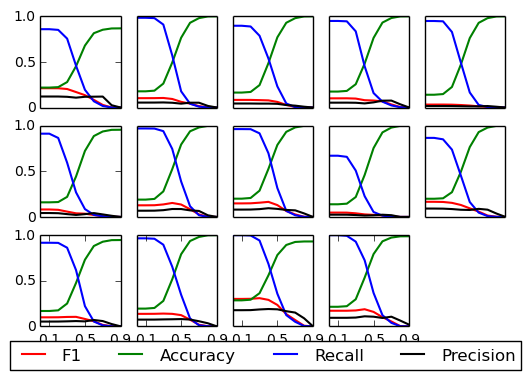

In [330]:
#!/usr/bin/python
"""This cell draws plot from file 'threshold_class_metrics'
"""
import cPickle
from matplotlib.pyplot import *
from matplotlib import *
rcParams['figure.figsize'] = (2, 26)
%matplotlib inline

with open('threshold_class_metrics', 'rb') as f:
    threshold_class_metrics = cPickle.load(f)

print threshold_class_metrics['threshold:1.0']['class:1']['f1']

linelist = {}
class_metrics = np.zeros(shape = (4, 10))
for i in xrange(1, 15):
    for count_t, threshold in enumerate([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]):
        for count_m, metric in enumerate(['f1', 'accuracy', 'recall', 'precision']):
            class_metrics[count_m, count_t] = threshold_class_metrics[
                'threshold:' + str(threshold)]['class:' + str(i)][metric]
    subplot(3, 5, i)
    for count_s, style in enumerate(['r','g','b','k']):
        line, = plot(class_metrics[count_s, :], style, linewidth = 1.5)
        linelist[count_s] = line
        if i > 10:
            xticks([1, 5, 9], [0.1, 0.5, 0.9])
        else:
            xticks([],[])
        if i in [1, 6, 11]:
            yticks([0, 0.5, 1.0],[0, 0.5, 1.0])
        else:
            yticks([],[])

xlabel('Threshold')
figlegend([linelist[0],linelist[1], linelist[2], linelist[3]], ['F1','Accuracy','Recall','Precision'], 'lower center', ncol = 4)

In [309]:
help(figlegend)

Help on function figlegend in module matplotlib.pyplot:

figlegend(handles, labels, loc, **kwargs)
    Place a legend in the figure.
    
    *labels*
      a sequence of strings
    
    *handles*
      a sequence of :class:`~matplotlib.lines.Line2D` or
      :class:`~matplotlib.patches.Patch` instances
    
    *loc*
      can be a string or an integer specifying the legend
      location
    
    A :class:`matplotlib.legend.Legend` instance is returned.
    
    Example::
    
      figlegend( (line1, line2, line3),
                 ('label1', 'label2', 'label3'),
                 'upper right' )
    
    .. seealso::
    
       :func:`~matplotlib.pyplot.legend`



In [280]:
print class_metrics[3,:]

[ nan  nan  nan  nan  nan  nan  nan  nan  nan  nan]
